# Descriptive Analysis of the papers

This is a descriptive approach to extract insights on the review in form of quantitative meta analysis and visualization.

Steps for a clean xlsx-File:
1. Download the [spreadsheet](https://docs.google.com/spreadsheets/d/1uM_VpRDk2YLPrqe4KiA_20HWBWmcSw_f9orz6cuOieQ/edit?pli=1#gid=1960060281) as xlsx.
1. 

In [1]:
# %pip install -r requirements.txt

In [2]:
import os
os.chdir("/home/jovyan/work/BCI/SLR_EEG_motion_artifact_correction_methods/")

import sys
import time
from datetime import datetime

import math
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
PRISMA_RESULT_PATH = "Passed_papers/papers_passed.csv"
TABLE_NAME = "Systematic Literature Review on Motion Artifact Removal of EEG Signals.xlsx"

## Load the Search Results

In [4]:
# this file is used as template on google docs
df = pd.read_csv(PRISMA_RESULT_PATH)
df.index += 1  # increment index such that it fits with the used indices
df.head(2)

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,Ref
1,35590859,Motion Artifacts Correction from Single-Channe...,"Hossain MS, Chowdhury MEH, Reaz MBI, Ali SHM, ...",Sensors (Basel). 2022 Apr 21;22(9):3169. doi: ...,Hossain MS,Sensors (Basel),2022,2022/05/20,PMC9102309,NaN,10.3390/s22093169,Hossain22
2,35459033,Improved Cognitive Vigilance Assessment after ...,"Abu Farha N, Al-Shargie F, Tariq U, Al-Nashash H.",Sensors (Basel). 2022 Apr 15;22(8):3051. doi: ...,Abu Farha N,Sensors (Basel),2022,2022/04/23,PMC9033092,NaN,10.3390/s22083051,Farha22


## Load the Spreadsheets into separate DataFrames

### papers_passed

In [5]:
dtypes = {
     'Publication Year': pd.Int64Dtype(),
     'Create Date': pd.DatetimeIndex
}
papers_passed_df = pd.read_excel(TABLE_NAME, engine='openpyxl', sheet_name="papers_passed", dtype=dtypes, 
                                  usecols=['Reference', 'Title', 'Authors', 'Publication Year', 'Create Date'])
papers_passed_df.set_index("Reference", inplace=True)
papers_passed_df.info()
papers_passed_df.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, Hossain22 to Jung01
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Title             78 non-null     object        
 1   Authors           78 non-null     object        
 2   Publication Year  78 non-null     Int64         
 3   Create Date       78 non-null     datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), object(2)
memory usage: 3.1+ KB


,Title,Authors,Publication Year,Create Date
Reference,,,,
Hossain22,Motion Artifacts Correction from Single-Channe...,"Hossain MS, Chowdhury MEH, Reaz MBI, Ali SHM, ...",2022,2022-05-20
Abu22,Improved Cognitive Vigilance Assessment after ...,"Abu Farha N, Al-Shargie F, Tariq U, Al-Nashash H.",2022,2022-04-23


### Authors

In [6]:
authors_df = pd.read_excel(TABLE_NAME, engine='openpyxl', sheet_name="Authors", dtype=dtypes)
authors_df.set_index("Reference", inplace=True)
print(f'WARNING: {sum(authors_df["Institution"].isnull())} null values')
# assert sum(authors_df["Institution"].isnull()) == 0  # TODO check this criteria
authors_df = authors_df[~authors_df["Institution"].isnull()]
authors_df.info()
authors_df.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, Hossain22 to Jung01
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Author (alle Autoren angeben)  471 non-null    object
 1   Institution                    471 non-null    object
dtypes: object(2)
memory usage: 11.0+ KB


,Author (alle Autoren angeben),Institution
Reference,,
Hossain22,Hossain MS,"University Kebangsaan Malaysia, Malaysia"
Hossain22,Chowdhury MEH,"Qatar University, Qatar"


In [7]:
assert len(authors_df.index.unique()) == 77

In [8]:
", ".join(authors_df.index.unique())

'Hossain22, Abu-Farha22, Flo22, Kumaravel22, Soghoyan21, Karpiel21, Beach21, Dai21, Tost21, Kaur21, Rosanne21, Nahmias21, Saba-Sadiya21, Li21, Anders20, Zhang20, Leach20, Saini20, Mucarquer20, Nordin20, Liu19, Benda19, Val-Calvo19, Saavedra19, Mur19, Blum19, Nordin19, Grosselin19, Li18, Chu18, San-Martin18, Sebek18, Arad18, Symeonidou18, Stone18, Frolich18, Gabard-Durnam18, Tamburro18, Lin18, Delisle-Rodriguez17, Wang17, Jas17, Oliveira17, DelPozo-Banos17, Weiss17, Roy17, Melman16, Oliveira16, Cheveigne16, Costa16, Nathan16, Zou16, Gordon15, Snyder15, Kline15, Raduntz15, Mariani15, Zhang15, Bulea14, Chen14, Yilmaz14, Reis14, Boudet14, Li13, Lawhern13, Nottage13, Yong12, Lau12, Lawhern12, Winkler11, Gwin10, McMenamin10, Mosher09, McMenamin09, Delorme04, Iriarte03, Jung01'

### Papers_annotated

In [9]:
dtypes = {
     'Journal/Book': 'category',
     'reader': 'category',
     'mental strategy': 'category',
     'framework': 'category',
     'open code': 'category',
     'Index': 'int32'
}

papers_annotated_df = pd.read_excel(TABLE_NAME, engine='openpyxl', sheet_name="papers_annotated", 
                                    dtype=dtypes, skipfooter=3)
# papers_annotated_df = papers_annotated_df[~papers_annotated_df["reader"].isnull()]
papers_annotated_df.rename(columns={
    "sample (size, sex, age group, health status)": "sample",
    "open code (yes, no, -)": "open code"}, inplace=True)
papers_annotated_df.set_index("Reference", inplace=True)
assert papers_annotated_df.shape[0] == 77  # assert 77 papers

In [10]:
papers_annotated_df.info()  # int: Index. categories: journal, reader, mental strategy, framework

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, Hossain22 to Jung01
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Index                   77 non-null     int32   
 1   Title                   77 non-null     object  
 2   Authors                 77 non-null     object  
 3   Journal/Book            77 non-null     category
 4   reader                  77 non-null     category
 5   mental strategy         76 non-null     category
 6   objective               77 non-null     object  
 7   data acquisition        77 non-null     object  
 8   sample                  77 non-null     object  
 9   #sample                 73 non-null     object  
 10  evaluation metrics      76 non-null     object  
 11  framework               75 non-null     category
 12  open code               76 non-null     object  
 13  Innovation / Finding    75 non-null     object  
 14  further work suggeste

In [11]:
papers_annotated_df.tail(2)

,Index,Title,Authors,Journal/Book,reader,mental strategy,objective,data acquisition,sample,#sample,evaluation metrics,framework,open code,Innovation / Finding,further work suggested,Additional information
Reference,,,,,,,,,,,,,,,,
Iriarte03,713,Independent component analysis as a tool to el...,"Iriarte J, Urrestarazu E, Valencia M, Alegre M...",J Clin Neurophysiol,mst,-,Objectively test the capability of ICA (JADE a...,64-channel digital EEG using LaMont amplifiers...,Two series of samples of interictal EEG (betwe...,2,Visual,Matlab,-,Demonstrated/Validated utility of ICA (JADE al...,-,Pretty basic ICA evaluation paper; JADE algori...
Jung01,725,Imaging Brain Dynamics Using Independent Compo...,"Jung TP, Makeig S, McKeown MJ, Bell AJ, Lee TW...",Proc IEEE Inst Electr Electron Eng,cs,attention strategy,Outlining the assumptions underlying ICA in re...,"29-channel EEG system (Electrocap, Inc.) 10-20...",10 subjects (8 males) right-handed with normal...,10,-,NaN,no,"There are 4 assumptions underlying ICA, which ...",NaN,NaN


In [12]:
# # Merge with papers_passed
# papers_annotated_df = papers_annotated_df.merge(papers_passed_df, how='outer')
# papers_annotated_df.tail(2)

### Pipelines

In [13]:
dtypes = {
    'is new': pd.Int64Dtype(),
    'EEG (#ch)': pd.Int64Dtype(),
    # 'Epoch width (s)': 'float64',  # no not possible here
    'fit score (0-2)': pd.Int64Dtype(),
    'online score (0-2)': pd.Int64Dtype()
}
pipelines_df = pd.read_excel(TABLE_NAME, engine='openpyxl', sheet_name="Pipelines", header=1, 
                             na_values="-", dtype=dtypes, skipfooter=1)
pipelines_df = pipelines_df[~pipelines_df["Pipeline ID (unique per paper)"].isnull()]
pipelines_df.rename(columns={
    "Pipeline ID (unique per paper)": "Pipeline",
    "Filter (HP, LP, BP, BR)": "filter"}, inplace=True)
pipelines_df.set_index(["Reference", "Pipeline"], inplace=True)
print(pipelines_df.shape)
# TODO check if Bruhn02 is shown and needed? All fields "Pipeline ID (unique per paper)" must be provided
pipelines_df.tail(2)

(299, 59)


,,is new,EEG (#ch),"electrode type (w,g,d)",MEG,ECG,EMG,Others,filter,MA,AF,Other,Epoch width (s),Feature Extraction (#),Fourier Transf.,Wavelet Transf.,Welch,LSP,PCC,CCA,ICA,NMF,PCA,t-SNE,EMD,IVA,CSP,Other.1,Linear Regression,DA,SVM,Spatial sph. spline,GMM,Other.2,Autoencoder,GAN,Other.3,MARA,DSS,DFA,FASTER,ADJUST,HAPPE,ERASE,Other.4,DA.1,KNN,KMC,ED,NB,DT,RF,SVM.1,NN,GMM.1,MEC,Other.5,fit score (0-2),online score (0-2),details
Reference,Pipeline,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Iriarte03,HF_LF_NOTCH,0,64,NaN,NaN,NaN,NaN,NaN,1: HF (35 Hz; IIR order 4) + LF (0.3 Hz; IIR o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN
Jung01,ICA,0,29,NaN,NaN,NaN,NaN,NaN,1: BP 0.1-50 Hz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,It is averaged across multiple trials and even...


In [14]:
# Show all pipelines that could fit and be online
scored_pipelines = pipelines_df[["fit score (0-2)", "online score (0-2)"]].dropna()
fit_pipelines = scored_pipelines[scored_pipelines["fit score (0-2)"] * scored_pipelines["online score (0-2)"] > 0]
fit_pipelines.head(2)

fit score (0-2)  online score (0-2)
Reference Pipeline                                     
Hossain22 WPD(db1)                2                   2
          WPD(db2)                2                   2

### Merge statistics

In [15]:
pipelines_annotated_df = pipelines_df.merge(papers_annotated_df, 
                                  how="outer", left_on=["Reference"], right_on=["Reference"])
pipelines_annotated_df["year"] = pipelines_annotated_df.index 
pipelines_annotated_df["year"] = pipelines_annotated_df["year"].apply(lambda x: 2000+int(x[-2:]))

In [16]:
pipelines_annotated_df.sample(2)

,is new,EEG (#ch),"electrode type (w,g,d)",MEG,ECG,EMG,Others,filter,MA,AF,Other,Epoch width (s),Feature Extraction (#),Fourier Transf.,Wavelet Transf.,Welch,LSP,PCC,CCA,ICA,NMF,PCA,t-SNE,EMD,IVA,CSP,Other.1,Linear Regression,DA,SVM,Spatial sph. spline,GMM,Other.2,Autoencoder,GAN,Other.3,MARA,DSS,DFA,FASTER,ADJUST,HAPPE,ERASE,Other.4,DA.1,KNN,KMC,ED,NB,DT,RF,SVM.1,NN,GMM.1,MEC,Other.5,fit score (0-2),online score (0-2),details,Index,Title,Authors,Journal/Book,reader,mental strategy,objective,data acquisition,sample,#sample,evaluation metrics,framework,open code,Innovation / Finding,further work suggested,Additional information,year
Reference,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mucarquer20,1,32,NaN,NaN,NaN,4.0,NaN,1: BP 0.1 - 256 Hz,NaN,NaN,NaN,2: 4,NaN,NaN,NaN,NaN,NaN,NaN,4: CCA,NaN,NaN,NaN,NaN,3: EEMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,144,Improving EEG Muscle Artifact Removal With an ...,"Mucarquer JA, Prado P, Escobar MJ, El-Deredy W...",IEEE Trans Instrum Meas,mst,attention strategy,adding an EMG array to EEMD-CCA,clean data set: 32-channel of EEG recorded fro...,clean data set: two subjects\n\ncontamination:...,3,RRMSE,Matlab,-,Independently of the number of muscular source...,Effects of EMG addition should be tested with ...,-,2020
Hossain22,1,2,NaN,NaN,NaN,NaN,acc,1: NOTCH (3rd order Butterworth; center-f at 5...,NaN,NaN,NaN,NaN,NaN,NaN,2: db3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,8,Motion Artifacts Correction from Single-Channe...,"Hossain MS, Chowdhury MEH, Reaz MBI, Ali SHM, ...",Sensors (Basel),mst,-,proposes 2 methods: (i) Wavelet packet decompo...,Single channel EEG with ground truth reference...,collected from six patients\nin four different...,6,"SNR, average percentage reduction in artifacts",Matlab,no,Proposed WPD algorithms were investigated by 1...,The paper describes the disadvantages of many ...,"Would benefit from largely comparing DWT, EMD,...",2022


### Pipeline Results

In [17]:
dtypes = {
     'Reference': 'category',
     # 'Setup ID': 'int32',  # only possible if they are non-floats
     # 'Data ID': 'int32', 
     'Metric': 'category',
     'Pipeline': 'category',
     'rank': 'float64'  # we break ties evenly
}

results_df = pd.read_excel(TABLE_NAME, engine='openpyxl', sheet_name="Results", 
                           na_values="-", header=1, dtype=dtypes, 
                           converters={"Setup ID": lambda x: str(x), "Data ID": lambda x: str(x)})
results_df.rename(columns={"rank in paper": "rank", "Pipeline ID (per paper)": "Pipeline"}, inplace=True)
# results_df = results_df.loc[results_df.index.dropna()]
results_df = results_df.loc[results_df["Pipeline"].dropna().index]  # drop rows with NaN-Pipeline
results_df.drop(columns="details", inplace=True)
results_df["Setup ID"] = results_df["Setup ID"].astype(np.int32)
results_df["Data ID"] = results_df["Data ID"].astype(np.int32)
assert results_df[results_df["Metric"].isna()].shape[0] == 0  # should be empty
# results_df.dropna(inplace=True)
results_df.info()
results_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 0 to 811
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Reference  787 non-null    category
 1   Setup ID   787 non-null    int32   
 2   Data ID    787 non-null    int32   
 3   Metric     787 non-null    category
 4   Pipeline   787 non-null    object  
 5   rank       785 non-null    float64 
dtypes: category(2), float64(1), int32(2), object(1)
memory usage: 31.4+ KB


,Reference,Setup ID,Data ID,Metric,Pipeline,rank
591,Delisle-Rodriguez17,2,2,FPR(%),Filter-Bank CSP,6.0
109,Soghoyan21,1,1,PR-AUC,SVM,2.0
311,Saba-Sadiya21,2,2,f-score,PCA,3.0
383,Saini20,3,3,PRD,Wavelet Denoising,5.0
623,Delisle-Rodriguez17,3,2,accuracy,Filter-Bank CSP,5.5


In [18]:
# Merge Pipelines with their results
fit_results_df = results_df.merge(
    right=scored_pipelines, how="left", 
    left_on=["Reference", "Pipeline"], right_on=["Reference", "Pipeline"])
fit_results_df.head(5)

,Reference,Setup ID,Data ID,Metric,Pipeline,rank,fit score (0-2),online score (0-2)
0,Hossain22,1,1,SNR,WPD(db1),10.5,2,2
1,Hossain22,1,1,SNR,WPD(db2),10.5,2,2
2,Hossain22,1,1,SNR,WPD(db3),10.5,2,2
3,Hossain22,1,1,SNR,WPD(sym4),10.5,2,2
4,Hossain22,1,1,SNR,WPD(sym5),10.5,2,2


## Basic explorative analysis

### Journal, most common over time

In [19]:
# filter the rows in papers_passed, that are really in our set:
df = df.loc[df["Ref"].apply(lambda ref: ref in set(authors_df.index))]

In [20]:
df["Journal/Book"].value_counts()[:10]

Front Neurosci          10
Sensors (Basel)          7
Front Hum Neurosci       7
J Neurosci Methods       6
J Healthc Eng            3
Psychophysiology         3
PLoS One                 3
Neuroimage               2
Healthc Technol Lett     2
J Neuroeng Rehabil       2
Name: Journal/Book, dtype: int64

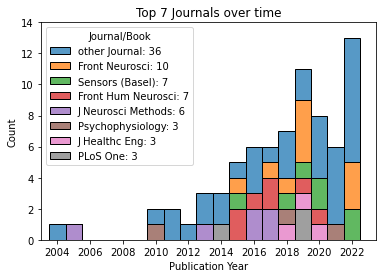

'The trend of the most common Journals over time. Only four Journals contribute more than three publications to this subject of interest.'

In [21]:
# Get the journals in order by ascending counts, also in the dataframe
top_n = 7
joi = df["Journal/Book"].value_counts()[:top_n]
other_j = "other Journal"
df_ = df.copy()
df_["Journal/Book"] = df_["Journal/Book"].apply(lambda j: j if j in joi else other_j)
journals = list(df_["Journal/Book"].value_counts().index)
j_counts = list(df_["Journal/Book"].value_counts())
journals.remove(other_j)
journals = [other_j] + journals
df_["Journal/Book"] = pd.Categorical(df_["Journal/Book"], journals)

# Append the journal counts to their names in the dataframe
label_dict = {j: f"{j}: {j_counts[i]}" for i, j in enumerate(journals)}
df_["Journal/Book"] = df_["Journal/Book"].map(label_dict)

# Plot the histogram
df_["Publication Year"] += 0.5
sns.histplot(data=df_, x="Publication Year", hue="Journal/Book", multiple="stack", binwidth=1).set(title=f"Top {top_n} Journals over time")

plt.xticks(np.arange(2000, 2023, 2))
plt.yticks(range(0, 15, 2))
plt.xlim(2003, None)
plt.show()
"The trend of the most common Journals over time. Only four Journals contribute more than three publications to this subject of interest."

### Autors, most common

In [22]:
# There are two persons with the Name X. Chen
authors_df["Author (alle Autoren angeben)"].value_counts()[:10] #.value_counts()[:25]

Ferris DP      11
Hairston WD     7
Chen X          4
König P         4
Makeig S        4
Raimondo F      4
Zou Y           3
Ren H           3
Li C            3
Cheveigne A     3
Name: Author (alle Autoren angeben), dtype: int64

In [23]:
authors_df["Author (alle Autoren angeben)"].value_counts().value_counts()[:25]

1     266
2      54
3      21
4       4
11      1
7       1
Name: Author (alle Autoren angeben), dtype: int64

### Countries, most common

In [24]:
institutions_d = dict()
last_author = None
last_instances = list()
for author, row in authors_df.iterrows():
    if author != last_author:
        for instance in list(set(last_instances)):
            institutions_d[instance] = institutions_d.get(instance, 0) + 1
        last_instances = list()
        last_author = author
    last_instances.append(row["Institution"].split(",")[-1].strip())

In [25]:
# 10 counties involved in the most contributions
sorted(institutions_d.items(), key=lambda k: -k[1])[:15]

[('USA', 31),
 ('Germany', 13),
 ('China', 8),
 ('Spain', 7),
 ('France', 6),
 ('Canada', 5),
 ('UK', 4),
 ('Italy', 3),
 ('India', 3),
 ('United Arab Emirates', 2),
 ('Argentina', 2),
 ('Chile', 2),
 ('Brazil', 2),
 ('Denmark', 2),
 ('Malaysia', 1)]

In [26]:
len(institutions_d)

33

In [27]:
# duplicate counts for multiple authors
authors_df["Institution"].apply(lambda x: x.split(",")[-1].strip()).value_counts()[:10]

USA          170
China         45
Spain         39
France        35
Germany       31
Canada        16
Singapore     13
Brazil        13
Italy         13
Russia        12
Name: Institution, dtype: int64

### Institutions, most common

In [28]:
institutions_d = dict()
last_author = None
last_instances = list()
for author, row in authors_df.iterrows():
    if author != last_author:
        for instance in list(set(last_instances)):
            institutions_d[instance] = institutions_d.get(instance, 0) + 1
        last_instances = list()
        last_author = author
    last_instances.append(row["Institution"])

In [29]:
# 10 institutions involved in the most contributions
sorted(institutions_d.items(), key=lambda k: -k[1])[:15]

[('US Army Research Laboratory, USA', 8),
 ('University of Michigan, USA', 6),
 ('University of California San Diego, USA', 4),
 ('University of Florida, USA', 3),
 ('CIBER-BBN, Spain', 2),
 ('University of Maryland, USA', 2),
 ('University of Southern California, USA', 2),
 ('Universidad de Valparaiso, Chile', 2),
 ('Technische Universität Berlin, Germany', 2),
 ('Harvard University, USA', 2),
 ('University of Osnabrück, Germany', 2),
 ('University Medical Center Hamburg-Eppendorf, Germany', 2),
 ('Aberdeen Proving Ground, USA', 2),
 ('University of Houston, USA', 2),
 ('University of British Columbia, Canada', 2)]

In [30]:
## Print institutions in form of (county, institution)
# sorted({(k.split(",")[-1].strip(), k.split(",")[0]): v for k, v in institutions_d.items()})

In [31]:
# with duplicate counts
authors_df["Institution"].value_counts()[:15]

University of Michigan, USA                                                                     21
University of California Los Angeles, USA                                                       20
University of California San Diego, USA                                                         15
Thomas Jefferson University, USA                                                                13
US Army Research Laboratory, USA                                                                11
National University of Singapore, Singapore                                                     11
University of Wisconsin, USA                                                                     9
University of Maryland, USA                                                                      8
Harvard University, USA                                                                          8
University of British Columbia, Canada                                                           7
University

### Framework over year

In [32]:
print(f'number of publications using Matlab: \t{papers_annotated_df["framework"].apply(lambda s: "matlab" in s.lower()).sum()}')
print(f'number of publications using Python: \t{papers_annotated_df["framework"].apply(lambda s: "python" in s.lower()).sum()}')

number of publications using Matlab: 	49
number of publications using Python: 	6


In [33]:
papers_annotated_df["framework"].value_counts()

Matlab                                                                                            30
-                                                                                                 19
Python                                                                                             4
Matlab, EEGlab                                                                                     3
Matlab, EEGLab                                                                                     3
Matlab, EEGLAB                                                                                     3
EEGlab, Matlab                                                                                     2
Matlab, Python                                                                                     2
Matlab, EEGLAB, ERPLAB                                                                             1
Matlab, Persyst(v12)                                                                       

In [34]:
df_ = papers_annotated_df.copy()
df_["year"] = df_.index 
df_["year"] = df_["year"].apply(lambda x: 2000+int(x[-2:]))
df_ = df_[~df_["framework"].isnull()]

df_["matlab"] = df_["framework"].apply(lambda s: "matlab" in str(s).lower())
df_["python"] = df_["framework"].apply(lambda s: "python" in str(s).lower())
# df_.loc[df_["matlab"]==True, "matlab"] = True
# df_.loc[df_["python"]==True, "python"] = True
df_.groupby("year").agg({"matlab": "sum", "python": "sum"})

,matlab,python
year,,
2003,True,False
2004,True,False
2009,1,0
2010,2,0
2011,True,False
2012,3,0
2013,2,0
2014,2,0
2015,4,0


In [35]:
df_2 = pd.concat([df_.loc[df_["matlab"]], df_.loc[df_["python"]]])[["Index", "year", "matlab", "python"]]
df_2.loc[df_["matlab"], "framework"] = "Matlab"
df_2.loc[df_["python"], "framework"] = "Python"
df_2["framework"] = ["Matlab"]*df_["matlab"].sum() + ["Python"]*df_["python"].sum()

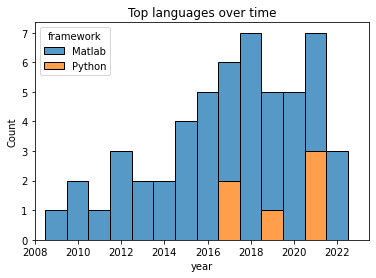

'The trend of programming languages over time depicts a clear dominance of Matlab. Three of five implementations with Python occured in 2022'

In [36]:
# Plot the histogram
df_2["year"] -= 0.5
sns.histplot(data=df_2, x="year", hue="framework", multiple="stack", binwidth=0.999).set(title=f"Top languages over time")
plt.xlim(2008, None)
plt.show()
"The trend of programming languages over time depicts a clear dominance of Matlab. Three of five implementations with Python occured in 2022"

### Open code over time

In [37]:
df_opencode = df_.groupby("year").agg({"open code": lambda x: np.sum(x=="yes")/len(x) if len(x)>=4 else np.NaN}) # ].value_counts()
df_opencode.loc[2014:]

,open code
year,
2014,0.250000
2015,0.000000
2016,0.333333
2017,0.428571
2018,0.090909
2019,0.250000
2020,0.166667
2021,0.300000
2022,0.500000


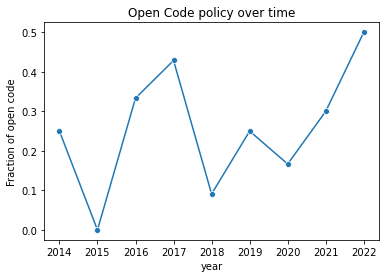

'For years with at least four publications, the fraction of papers with open code is depicted. The trend is rising strongly from 2020 (17\\%) to 2022 (50\\%)'

In [38]:
sns.lineplot(data=df_opencode, x="year", y="open code", marker="o").set(title=f"Open Code policy over time")
plt.ylabel("Fraction of open code")
# plt.ylim(0,1)
plt.show()
"For years with at least four publications, the fraction of papers with open code is depicted. The trend is rising strongly from 2020 (17\%) to 2022 (50\%)"

### Fraction of fit use-cases and online scores over year

In [39]:
pipelines_annotated_df_proposed = pipelines_annotated_df.loc[pipelines_annotated_df["is new"]==1]

In [40]:
def share_of_twos(x):
    if len(x) >= 4: 
        return np.sum(x==2) / len(x)
    return np.NaN

df_3 = pipelines_annotated_df_proposed.groupby("year").agg({"fit score (0-2)": share_of_twos, "online score (0-2)": share_of_twos})
df_3.loc[2011:]

,fit score (0-2),online score (0-2)
year,,
2011,0.000000,0.000000
2012,0.800000,1.000000
2013,0.000000,0.000000
2014,NaN,NaN
2015,0.500000,0.500000
2016,0.000000,0.142857
2017,0.583333,0.000000
2018,0.846154,0.230769
2019,0.125000,0.500000


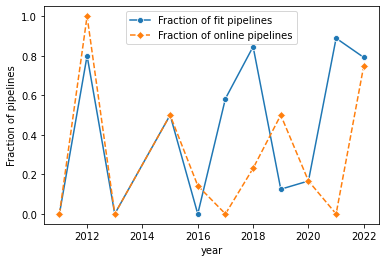

'The fraction of proposed pipelines that fit an use case with BCI and are online capable is rising slightly. Only years with four or more proposed pipelines are taken into account.'

In [41]:
sns.lineplot(data=df_3, x="year", y="fit score (0-2)", marker="o", label="Fraction of fit pipelines")
sns.lineplot(data=df_3, x="year", y="online score (0-2)", marker="D", linestyle="--", label="Fraction of online pipelines")
plt.ylabel("Fraction of pipelines")
# plt.ylim(0,1)
plt.legend()
plt.show()
"The fraction of proposed pipelines that fit an use case with BCI and are online capable is rising slightly. Only years with four or more proposed pipelines are taken into account."

### Evaluation metric

In [42]:
evametrics_d = dict()
for metrics in list(papers_annotated_df["evaluation metrics"].apply(lambda x: [m.split("(")[0].strip().lower() for m in str(x).split(",")]).values):
    for m in metrics:
        evametrics_d[m] = evametrics_d.get(m, 0) + 1

In [43]:
# sorted(evametrics_d.items(), key=lambda x: x[0])  # TODO check for the items, remove "" and "-"

In [44]:
if "" in evametrics_d: evametrics_d.pop("")
if "-" in evametrics_d: evametrics_d.pop("-")
if "nan" in evametrics_d: evametrics_d.pop("nan")
evametrics_d["rmse"] += evametrics_d.pop("rrmse", 0)
evametrics_d["rmse"] += evametrics_d.pop("mse", 0)

[('accuracy', 22), ('visual', 14), ('snr', 11), ('rmse', 7), ('sensitivity', 5), ('pds', 5), ('specificity', 4), ('f1-score', 4), ('correlation coefficient', 4)]


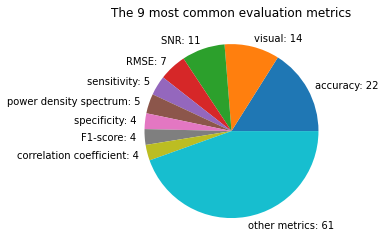

'Number of totally used evaluation metrics in publications. It can be seen that the majority of used metrics are used infrequently. The accuracy, visual proof and the signal-to-noise ratio (SNR) are the most comment evaluation metrics.'

In [45]:
# Get the journals in order by ascending counts, also in the dataframe
top_n = 9
metric_map = {
    "snr": "SNR",
    "rmse": "RMSE",
    "f1-score": "F1-score",
    "auc": "AUC",
    "pds": "power density spectrum"
}

metrics_oi = sorted(evametrics_d.items(), key=lambda x: -x[1])[:top_n]
metrics_oi.append(("other metrics", sum([count for m, count in sorted(evametrics_d.items(), key=lambda x: -x[1])[top_n:]])))
metrics_oi = [[f"{metric_map.get(p, p)}: {v}", v] for p,v in metrics_oi]

# label_dict = {j: f"{j}: {j_counts[i]}" for i, j in enumerate(journals)}
print(sorted(evametrics_d.items(), key=lambda x: -x[1])[:top_n])
plt.pie(np.array(metrics_oi)[:,1], labels=np.array(metrics_oi)[:,0])
plt.title(f"The {top_n} most common evaluation metrics")
plt.show()
"Number of totally used evaluation metrics in publications. It can be seen that the majority of used metrics are used infrequently. The accuracy, visual proof and the signal-to-noise ratio (SNR) are the most comment evaluation metrics."

### Distribution of the sample size and number of channels

In [46]:
samples = list()
for sizes in papers_annotated_df["#sample"].apply(lambda x: [s.strip() for s in str(x).split(",")]):
    for s in sizes:
        if s != "nan":
            samples.append(int(s))
np.quantile(samples, [0,0.25,0.50,0.75,1.00]), np.mean(samples)

(array([  1.  ,   7.  ,  10.  ,  18.25, 200.  ]), 16.41304347826087)

In [47]:
np.mean([s>=30 for s in samples])

0.07608695652173914

In [48]:
n_channels = list()
for sizes in pipelines_annotated_df.groupby("Reference").agg({"EEG (#ch)": "unique"})["EEG (#ch)"].values:
    for s in list(sizes):
        if not pd.isnull(s):
            # print(s, sizes)
            n_channels.append(int(s))
np.quantile(n_channels, [0,0.25,0.50,0.75,1.00]), np.mean(n_channels)

(array([  2.,  19.,  64.,  97., 256.]), 69.28767123287672)

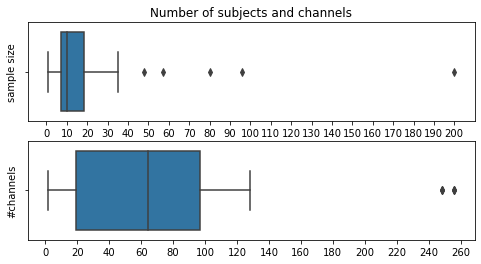

'Number of subjects over all used datasets and number of used EEG channels per publication. Half of the datasets consist of less than ten participants.'

In [49]:
fig, ax = plt.subplots(2,1, figsize=(8,4))
sns.boxplot(x=samples, ax=ax[0])
ax[0].set_ylabel("sample size")
ax[0].set_xticks(range(0, 201, 10))
sns.boxplot(x=n_channels, ax=ax[1])
ax[1].set_ylabel("#channels")
ax[1].set_xticks(range(0, 261, 20))
ax[0].set_title("Number of subjects and channels")
plt.show()
"Number of subjects over all used datasets and number of used EEG channels per publication. Half of the datasets consist of less than ten participants."

### Most common BCI-paradigms

In [50]:
bcimetrics_d = dict()
for metrics in list(papers_annotated_df["mental strategy"].astype("object").apply(
    lambda x: [str(m).split("(")[0].strip().lower() for m in str(x).split(",")]).values):
    if str(metrics) == "nan":
        continue
    # print(metrics)
    for m in metrics:
        bcimetrics_d[m] = bcimetrics_d.get(m, 0) + 1

sorted(bcimetrics_d.items(), key=lambda x: -x[1])  # TODO check for the items, remove "" and "-"

[('motor execution', 28),
 ('attention strategy', 25),
 ('-', 20),
 ('motor imagery', 8),
 ('ssvep', 2),
 ('nan', 1),
 ('mental arithmetic', 1),
 ('p300', 1),
 ('motor exectution', 1),
 ('aep', 1),
 ('vep', 1),
 ('motor imagery tasks', 1),
 ('motor tapping study', 1),
 ('nine different cognitive tasks', 1),
 ('...)', 1)]

In [51]:
BCI_PARADIGM_MIN_COUNT = 2

bcimetrics_d["other"] = 0
for key, count in bcimetrics_d.items():
    if count < BCI_PARADIGM_MIN_COUNT:
        bcimetrics_d["other"] += bcimetrics_d.get(key, 0)
bcimetrics_d = {key: count for key, count in bcimetrics_d.items() if count >= BCI_PARADIGM_MIN_COUNT}
sorted(bcimetrics_d.items(), key=lambda x: -x[1])  # TODO check for the items, remove "" and "-"

[('motor execution', 28),
 ('attention strategy', 25),
 ('-', 20),
 ('other', 10),
 ('motor imagery', 8),
 ('ssvep', 2)]

[('motor execution', 28), ('attention strategy', 25), ('-', 20), ('other', 10), ('motor imagery', 8), ('ssvep', 2)]


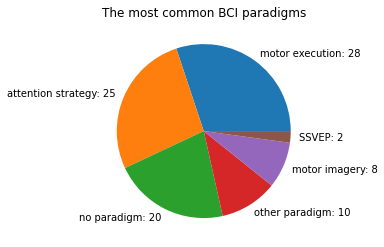

'Number of used BCI paradigms in publications.'

In [52]:
# Get the journals in order by ascending counts, also in the dataframe
top_n = 9
metric_map = {
    "-": "no paradigm",
    "ssvep": "SSVEP",
    "other": "other paradigm",
}

metrics_oi = sorted(bcimetrics_d.items(), key=lambda x: -x[1])[:top_n]
# metrics_oi.append(("other pardigm", sum([count for m, count in sorted(bcimetrics_d.items(), key=lambda x: -x[1])[top_n:]])))
metrics_oi = [[f"{metric_map.get(p, p)}: {v}", v] for p,v in metrics_oi]

# label_dict = {j: f"{j}: {j_counts[i]}" for i, j in enumerate(journals)}
print(sorted(bcimetrics_d.items(), key=lambda x: -x[1])[:top_n])
plt.pie(np.array(metrics_oi)[:,1], labels=np.array(metrics_oi)[:,0])
plt.title(f"The most common BCI paradigms")
plt.show()
"Number of used BCI paradigms in publications."

### Distribution of the Filter's cutoff-frequencies

In [53]:
def extract_highpass_cutoff(x):
    x = x.split("\t")[-1]
    values = list()
    if "HP" in x:
        values.append(
            float(x.split("HP")[-1].split("Hz")[0].split("(")[0].strip())
        )
    if "BP" in x:
        try:
            values.append(
                float(x.split("BP")[-1].split("-")[0].split("Hz")[0].split("(")[0].strip())
            )
        except Exception as e:
            print(x, ",", x.split("BP")[-1].split("-")[0].split("Hz")[0].split("(")[0].strip())
            print(e)
            time.sleep(1)
    return values

def extract_lowpass_cutoff(x):
    x = x.split("\t")[-1]
    values = list()
    try:
        if "LP" in x:
            values.append(
                float(x.split("LP")[-1].split("Hz")[0].split("(")[0].split(",")[0].strip())
            )
        if "BP" in x:
            values.append(
                float(x.split("BP")[-1].split("-")[-1].split("Hz")[0].split("(")[0].split(",")[0].strip())
            )
    except Exception as e:
        print(x, ",", x.split("LP")[-1].split("Hz")[0].split("(")[0].split(",")[0].strip())
        print(e)
        time.sleep(0.1)
    return values

pipelines_annotated_df["Ref+Filter"] = pipelines_annotated_df.index + "\t" + pipelines_annotated_df["filter"]
lowpass_coffs = list(map(lambda x: extract_lowpass_cutoff(str(x)), pipelines_annotated_df["Ref+Filter"].unique()))
highpass_coffs = list(map(lambda x: extract_highpass_cutoff(str(x)), pipelines_annotated_df["Ref+Filter"].unique()))

1: LP 200Hz (cutoff-f=200-300Hz) + Notch (50Hz) + BP 8-35Hz (5th-order Butterworth; gain=1.5) , 200
could not convert string to float: 'order Butterworth; gain=1.5)'
1: LP 200Hz (+Powerline-BP) , 200
could not convert string to float: ')'
1: LP 1000Hz (+Powerline-BP) , 1000
could not convert string to float: ')'
1: LP 200Hz (+Powerline-BP) , )
could not convert string to float: ')'
1: LP 1000Hz (+Powerline-BP) , )
could not convert string to float: ')'


In [54]:
lps = [v for sublist in lowpass_coffs for v in sublist]
hps = [v for sublist in highpass_coffs for v in sublist]

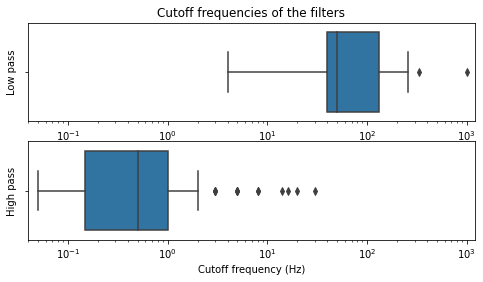

'Cutoff-frequencies of all filters, categorised into low-passes and high-passes and plotted on a logarithmic scale.'

In [55]:
fig, ax = plt.subplots(2,1, figsize=(8,4))
ax[0].set_title("Cutoff frequencies of the filters")
plot = sns.boxplot(x=lps, ax=ax[0]).set(xscale="log")
ax[0].set_ylabel("Low pass")
ax[0].set_xticks([0.1, 1, 10, 100, 1000])
ax[0].set_xlim(0.04, 1200)

sns.boxplot(x=hps, ax=ax[1]).set(xscale="log")
ax[1].set_ylabel("High pass")
ax[1].set_xticks([0.1, 1, 10, 100, 1000])
ax[1].set_xlim(0.04, 1200)
ax[1].set_xlabel("Cutoff frequency (Hz)")

plt.show()
"Cutoff-frequencies of all filters, categorised into low-passes and high-passes and plotted on a logarithmic scale."

## Analysis for the Methods

### Decomposition methods

#### Decomposition methods (number of pipelines)

In [56]:
distr = (~pipelines_annotated_df[['Fourier Transf.', 'Wavelet Transf.', 'Welch', 'LSP', 'PCC', 'CCA', 'ICA', 'NMF', 'PCA', 't-SNE', 'EMD', 'IVA', 'CSP', 'Other.1']].isnull()).sum(axis=0)
distr["Other"] = distr["Other.1"]

distr["Other"] += distr["Welch"]
distr["Other"] += distr["LSP"]
distr["Other"] += distr["PCC"]
distr["Other"] += distr["NMF"]
distr["Other"] += distr["t-SNE"]
distr["Other"] += distr["IVA"]
distr["Other"] += distr["CSP"]
[distr.pop(key) for key in ['Welch', 'LSP', 'PCC', 'NMF', 't-SNE', 'IVA', 'CSP', 'Other.1']]
distr

Fourier Transf.     29
Wavelet Transf.     48
CCA                 23
ICA                112
PCA                 42
EMD                 24
Other               51
dtype: int64

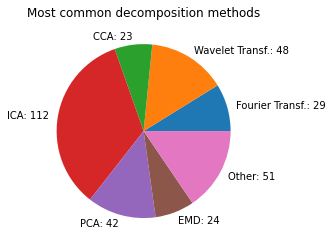

'Number of totally used decomposition methods.'

In [57]:
labels = [f"{p}: {v}" for p,v in distr.items()]
plt.pie(distr, labels=labels)
plt.title(f"Most common decomposition methods")
plt.show()
"Number of totally used decomposition methods."

#### Decomposition methods (total number of publications)

In [58]:
distr = (pipelines_annotated_df.groupby("Reference").agg("count")[
    ['Fourier Transf.', 'Wavelet Transf.', 'Welch', 'LSP', 'PCC', 'CCA', 'ICA', 'NMF', 'PCA', 't-SNE', 'EMD', 'IVA', 'CSP', 'Other.1']
        ]>0).sum(axis=0)
distr["Other"] = distr["Other.1"]

distr["Other"] += distr["Welch"]
distr["Other"] += distr["LSP"]
distr["Other"] += distr["PCC"]
distr["Other"] += distr["NMF"]
distr["Other"] += distr["t-SNE"]
distr["Other"] += distr["IVA"]
distr["Other"] += distr["CSP"]
[distr.pop(key) for key in ['Welch', 'LSP', 'PCC', 'NMF', 't-SNE', 'IVA', 'CSP', 'Other.1']]

# store in df_decomp
df_decomp = pd.DataFrame(data=distr, columns=["total"])
df_decomp.head()

,total
Fourier Transf.,10
Wavelet Transf.,12
CCA,9
ICA,36
PCA,18


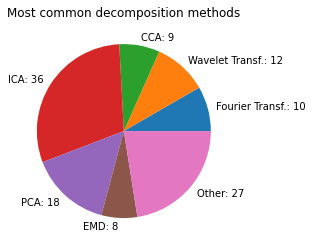

'Number of totally used decomposition methods.'

In [59]:
labels = [f"{p}: {v}" for p,v in distr.items()]
plt.pie(distr, labels=labels)
plt.title(f"Most common decomposition methods")
plt.show()
"Number of totally used decomposition methods."

#### Decomposition methods (proposed number of publications)

In [60]:
distr = (pipelines_annotated_df[pipelines_annotated_df["is new"] > 0].groupby("Reference").agg("count")[
    ['Fourier Transf.', 'Wavelet Transf.', 'Welch', 'LSP', 'PCC', 'CCA', 'ICA', 'NMF', 'PCA', 't-SNE', 'EMD', 'IVA', 'CSP', 'Other.1']
        ]>0).sum(axis=0)
distr["Other"] = distr["Other.1"]

distr["Other"] += distr["Welch"]
distr["Other"] += distr["LSP"]
distr["Other"] += distr["PCC"]
distr["Other"] += distr["NMF"]
distr["Other"] += distr["t-SNE"]
distr["Other"] += distr["IVA"]
distr["Other"] += distr["CSP"]
[distr.pop(key) for key in ['Welch', 'LSP', 'PCC', 'NMF', 't-SNE', 'IVA', 'CSP', 'Other.1']]

# store in df_decomp
df_decomp["proposed"] = distr
df_decomp.head()

,total,proposed
Fourier Transf.,10,7
Wavelet Transf.,12,9
CCA,9,6
ICA,36,17
PCA,18,9


#### Decomposition methods (number since 2020)

In [61]:
distr = (pipelines_annotated_df[pipelines_annotated_df["year"] >= 2020].groupby("Reference").agg("count")[
    ['Fourier Transf.', 'Wavelet Transf.', 'Welch', 'LSP', 'PCC', 'CCA', 'ICA', 'NMF', 'PCA', 't-SNE', 'EMD', 'IVA', 'CSP', 'Other.1']
        ]>0).sum(axis=0)
distr["Other"] = distr["Other.1"]

distr["Other"] += distr["Welch"]
distr["Other"] += distr["LSP"]
distr["Other"] += distr["PCC"]
distr["Other"] += distr["NMF"]
distr["Other"] += distr["t-SNE"]
distr["Other"] += distr["IVA"]
distr["Other"] += distr["CSP"]
[distr.pop(key) for key in ['Welch', 'LSP', 'PCC', 'NMF', 't-SNE', 'IVA', 'CSP', 'Other.1']]

# store in df_decomp
df_decomp["since 2020"] = distr
df_decomp.head()

,total,proposed,since 2020
Fourier Transf.,10,7,1
Wavelet Transf.,12,9,3
CCA,9,6,4
ICA,36,17,11
PCA,18,9,5


#### Decomposition methods (number of publications with fit pipelines of the type)

In [62]:
distr = (pipelines_annotated_df[pipelines_annotated_df["fit score (0-2)"] == 2].groupby("Reference").agg("count")[
    ['Fourier Transf.', 'Wavelet Transf.', 'Welch', 'LSP', 'PCC', 'CCA', 'ICA', 'NMF', 'PCA', 't-SNE', 'EMD', 'IVA', 'CSP', 'Other.1']
        ]>0).sum(axis=0)
distr["Other"] = distr["Other.1"]

distr["Other"] += distr["Welch"]
distr["Other"] += distr["LSP"]
distr["Other"] += distr["PCC"]
distr["Other"] += distr["NMF"]
distr["Other"] += distr["t-SNE"]
distr["Other"] += distr["IVA"]
distr["Other"] += distr["CSP"]
[distr.pop(key) for key in ['Welch', 'LSP', 'PCC', 'NMF', 't-SNE', 'IVA', 'CSP', 'Other.1']]

# store in df_decomp
df_decomp["fit"] = distr
df_decomp.head()

,total,proposed,since 2020,fit
Fourier Transf.,10,7,1,5
Wavelet Transf.,12,9,3,6
CCA,9,6,4,5
ICA,36,17,11,17
PCA,18,9,5,9


#### Decomposition methods (number of publications with online capable pipelines of the type)

In [63]:
distr = (pipelines_annotated_df[pipelines_annotated_df["online score (0-2)"] == 2].groupby("Reference").agg("count")[
    ['Fourier Transf.', 'Wavelet Transf.', 'Welch', 'LSP', 'PCC', 'CCA', 'ICA', 'NMF', 'PCA', 't-SNE', 'EMD', 'IVA', 'CSP', 'Other.1']
        ]>0).sum(axis=0)
distr["Other"] = distr["Other.1"]

distr["Other"] += distr["Welch"]
distr["Other"] += distr["LSP"]
distr["Other"] += distr["PCC"]
distr["Other"] += distr["NMF"]
distr["Other"] += distr["t-SNE"]
distr["Other"] += distr["IVA"]
distr["Other"] += distr["CSP"]
[distr.pop(key) for key in ['Welch', 'LSP', 'PCC', 'NMF', 't-SNE', 'IVA', 'CSP', 'Other.1']]

# store in df_decomp
df_decomp["online"] = distr
df_decomp.head()

,total,proposed,since 2020,fit,online
Fourier Transf.,10,7,1,5,6
Wavelet Transf.,12,9,3,6,5
CCA,9,6,4,5,2
ICA,36,17,11,17,10
PCA,18,9,5,9,4


### Plot the stacked barplot

In [64]:
def statistic(x, y, axis=0):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

def bootstrap_test_multiple(references, samples, alternative="less", n_resamples=1_000, verbose=0):
    significances = []
    for key in references.index:
        total_bools = np.array([1] * references[key] + [0] * (references.sum() - references[key]))
        sample_bools = [1] * samples[key] + [0] * (samples.sum() - samples[key])
        diffs = np.zeros(n_resamples)
        for idx in range(n_resamples):
            sampled_orig = np.random.choice(total_bools, size=len(total_bools), replace=True)
            diff = statistic(sampled_orig, sample_bools)
            if diff > 0:
                diffs[idx] = 1
        if alternative == "less":
            pvalue = np.round(1.0 -np.mean(diffs), 6)
        else:
            pvalue = np.round(np.mean(diffs), 6)
        significances.append(pvalue)

        if verbose >= 1:
            print(f"{key}: \tsample_count={samples[key]}, \treference_count={references[key]}, \tp_value={pvalue}")
    return significances

bootstrap_test_multiple(df_decomp["total"], df_decomp["since 2020"], alternative="less", n_resamples=1_000, verbose=1)

Fourier Transf.: 	sample_count=1, 	reference_count=10, 	p_value=0.01
Wavelet Transf.: 	sample_count=3, 	reference_count=12, 	p_value=0.438
CCA: 	sample_count=4, 	reference_count=9, 	p_value=0.984
ICA: 	sample_count=11, 	reference_count=36, 	p_value=0.896
PCA: 	sample_count=5, 	reference_count=18, 	p_value=0.665
EMD: 	sample_count=4, 	reference_count=8, 	p_value=0.995
Other: 	sample_count=3, 	reference_count=27, 	p_value=0.0


[0.01, 0.438, 0.984, 0.896, 0.665, 0.995, 0.0]

In [65]:
# calculate the p-values to all cases
p_values_proposed = bootstrap_test_multiple(df_decomp["total"], df_decomp["proposed"], alternative="greater", n_resamples=10_000)
p_values_2020 = bootstrap_test_multiple(df_decomp["total"], df_decomp["since 2020"], alternative="greater", n_resamples=10_000)
p_values_fit = bootstrap_test_multiple(df_decomp["total"], df_decomp["fit"], alternative="greater", n_resamples=10_000)
p_values_online = bootstrap_test_multiple(df_decomp["total"], df_decomp["online"], alternative="greater", n_resamples=10_000)

p_values_proposed_less = bootstrap_test_multiple(df_decomp["total"], df_decomp["proposed"], alternative="less", n_resamples=10_000)
p_values_2020_less = bootstrap_test_multiple(df_decomp["total"], df_decomp["since 2020"], alternative="less", n_resamples=10_000)
p_values_fit_less = bootstrap_test_multiple(df_decomp["total"], df_decomp["fit"], alternative="less", n_resamples=10_000)
p_values_online_less = bootstrap_test_multiple(df_decomp["total"], df_decomp["online"], alternative="less", n_resamples=10_000)

In [66]:
# annotate the significances
ALPHA = 0.1  #0.05
sig_char = ">"
sig_neg_char = "<"
insig_char = " "

significances_proposed = [sig_neg_char if p_values_proposed_less[idx] <= ALPHA else char 
                          for idx, char in enumerate([sig_char if p_values_proposed[idx] <= ALPHA else insig_char for idx in range(len(df_decomp))])]
significances_2020 = [sig_neg_char if p_values_2020_less[idx] <= ALPHA else char 
                      for idx, char in enumerate([sig_char if p_values_2020[idx] <= ALPHA else insig_char for idx in range(len(df_decomp))])]
significances_fit = [sig_neg_char if p_values_fit_less[idx] <= ALPHA else char 
                     for idx, char in enumerate([sig_char if p_values_fit[idx] <= ALPHA else insig_char for idx in range(len(df_decomp))])]
significances_online = [sig_neg_char if p_values_online_less[idx] <= ALPHA else char 
                        for idx, char in enumerate([sig_char if p_values_online[idx] <= ALPHA else insig_char for idx in range(len(df_decomp))])]


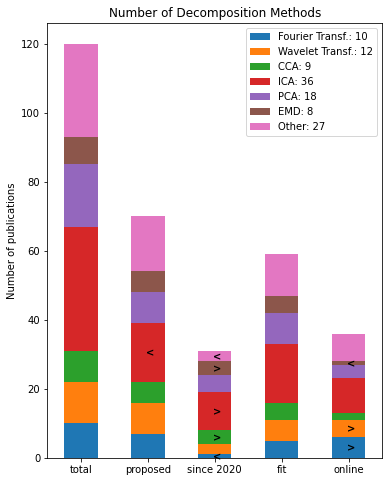

In [67]:
# Plot the results
fig = df_decomp.T.plot(kind='bar', stacked=True, figsize=(6,8))
text_init_height = -1.1

# Print the significance levels
cumsum = text_init_height
for idx, val in enumerate(df_decomp["proposed"]):
    cumsum += val/2
    plt.text(0.9725, cumsum, significances_proposed[idx], fontweight="bold")
    cumsum += val/2
cumsum = text_init_height
for idx, val in enumerate(df_decomp["since 2020"]):
    cumsum += val/2
    plt.text(1.9725, cumsum, significances_2020[idx], fontweight="bold")
    cumsum += val/2
cumsum = text_init_height
for idx, val in enumerate(df_decomp["fit"]):
    cumsum += val/2
    plt.text(2.9725, cumsum, significances_fit[idx], fontweight="bold")
    cumsum += val/2
cumsum = text_init_height
for idx, val in enumerate(df_decomp["online"]):
    cumsum += val/2
    plt.text(3.9725, cumsum, significances_online[idx], fontweight="bold")
    cumsum += val/2

# plot layout
plt.title("Number of Decomposition Methods")
plt.ylabel("Number of publications")
plt.xticks(rotation=0)
plt.legend(labels, loc="upper right")
plt.show()

#### ICA flavors methods (total)

In [68]:
ica_map = {
    "Fast ICA": "FastICA",
    "ICA-": "wICA",
    "w-ICA": "wICA"
}
    

def extract_flavor(x):
    x = str(x).split("\t")[-1]
    if str(x) == "nan":
        return list()
    flavors = list()
    for m in str(x).split(","):
        for method in m.split("+"):
            r = method.split(":")[-1].strip()
            if not r.isnumeric() and r != "ICA":
                flavors.append(
                    ica_map.get(r, r)
                )
            else:
                flavors.append("unspecified")
    return flavors

pipelines_annotated_df["Ref+ICA"] = pipelines_annotated_df.index + "\t" + pipelines_annotated_df["ICA"]
flavors = list(map(extract_flavor, pipelines_annotated_df["Ref+ICA"].unique()))
flavors = [f for sublist in flavors for f in sublist]

In [69]:
np.unique(flavors, return_counts=True)

(array(['AMICA', 'CCA', 'CUDAICA', 'EAWICA', 'ERICA', 'FastICA',
        'Fourier-ICA', 'ICA-W', 'IMICA', 'Infomax', 'InfomaxICA', 'JADE',
        'MCCA', 'SCICA', 'TDSEP', 'extended Infomax', 'unspecified',
        'wICA'], dtype='<U16'),
 array([ 8,  1,  1,  1,  1,  8,  1,  1,  1,  2,  7,  2,  1,  1,  3,  3, 13,
         9]))

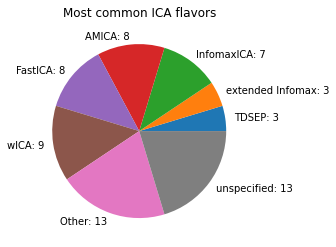

'Most common ICA methods.'

In [70]:
threshold = 3
labels, counts = np.unique(flavors, return_counts=True)
labels = [f"{f}: {counts[i]}" for i, f in enumerate(labels)]

labels.append("Other")
counts = list(counts)
counts.append(0)
droplist = []
for i, c in enumerate(counts):
    if c < threshold:
        counts[-1] += c
        droplist.append(i)
labels = [lab for i, lab in enumerate(labels) if i not in droplist]
counts = [c for i, c in enumerate(counts) if i not in droplist]
labels[-1] = f"Other: {counts[-1]}"

plt.pie(sorted(counts), 
        labels=[lab for _, lab in sorted(zip(counts, labels))])
plt.title(f"Most common ICA flavors")
plt.show()
"Most common ICA methods."

#### Artefact detection and correction methods (total number of publications using them)

In [71]:
distr = (pipelines_annotated_df.groupby("Reference").agg("count")[
    ['Linear Regression', 'DA', 'SVM', 'Spatial sph. spline', 'GMM', 'Other.2', 'Autoencoder', 'GAN', 'Other.3']
        ]>0).sum(axis=0)
distr["Other"] = distr["Other.2"] + distr["Other.3"]
# distr["CSP"] = distr["CSP.1"]

distr["Other"] += distr["GMM"]
distr["Other"] += distr["Autoencoder"]
distr["Other"] += distr["GAN"]
[distr.pop(key) for key in distr.keys() if key in ['GMM', 'Autoencoder', 'GAN', 'Other.2', 'Other.3']]

# store in df_decomp
df_decomp = pd.DataFrame(data=distr, columns=["total"])
df_decomp.head()

,total
Linear Regression,3
DA,3
SVM,4
Spatial sph. spline,4
Other,23


In [72]:
colors = {
    'Linear Regression': "C1",
     'SVM': "C2",
     'Spatial sph. spline': "C3",
     'CSP': "C4",
     'DA': "C5",
     'Other': "C6",
}

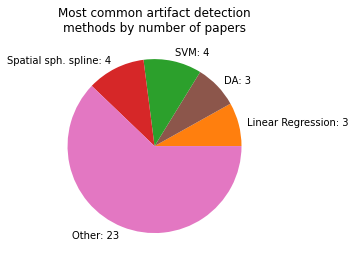

'Number of publications pipelines with selected artifact methods, methods occuring only in one publications are ignored.'

In [73]:
labels = [f"{p}: {v}" for p,v in distr.items()]
plt.pie(distr, labels=labels, colors=[colors[lab.split(":")[0]] for lab in labels])
plt.title(f"Most common artifact detection\nmethods by number of papers")
plt.show()
"Number of publications pipelines with selected artifact methods, methods occuring only in one publications are ignored."

#### Artefact detection and correction methods (proposed number of publications using them)

In [74]:
distr = (pipelines_annotated_df[pipelines_annotated_df["is new"] > 0].groupby("Reference").agg("count")[
    ['Linear Regression', 'DA', 'SVM', 'Spatial sph. spline', 'GMM', 'Other.2', 'Autoencoder', 'GAN', 'Other.3']
        ]>0).sum(axis=0)
distr["Other"] = distr["Other.2"] + distr["Other.3"]
# distr["CSP"] = distr["CSP.1"]

distr["Other"] += distr["GMM"]
distr["Other"] += distr["Autoencoder"]
distr["Other"] += distr["GAN"]
[distr.pop(key) for key in distr.keys() if key in ['GMM', 'Autoencoder', 'GAN', 'CSP.1', 'Other.2', 'Other.3']]

# store in df_decomp
df_decomp["proposed"] = distr
df_decomp.head()

,total,proposed
Linear Regression,3,2
DA,3,1
SVM,4,3
Spatial sph. spline,4,3
Other,23,19


#### Artefact detection and correction methods (number of publications since 2020 using them)

In [75]:
distr = (pipelines_annotated_df[pipelines_annotated_df["year"] >= 2020].groupby("Reference").agg("count")[
    ['Linear Regression', 'DA', 'SVM', 'Spatial sph. spline', 'GMM', 'Other.2', 'Autoencoder', 'GAN', 'Other.3']
        ]>0).sum(axis=0)
distr["Other"] = distr["Other.2"] + distr["Other.3"]
# distr["CSP"] = distr["CSP.1"]

distr["Other"] += distr["GMM"]
distr["Other"] += distr["Autoencoder"]
distr["Other"] += distr["GAN"]
[distr.pop(key) for key in distr.keys() if key in ['GMM', 'Autoencoder', 'GAN', 'CSP.1', 'Other.2', 'Other.3']]

# store in df_decomp
df_decomp["since 2020"] = distr
df_decomp.head()

,total,proposed,since 2020
Linear Regression,3,2,1
DA,3,1,0
SVM,4,3,2
Spatial sph. spline,4,3,3
Other,23,19,9


#### Artefact detection and correction methods (number publications of fit pipelines using them)

In [76]:
distr = (pipelines_annotated_df[pipelines_annotated_df["fit score (0-2)"] == 2].groupby("Reference").agg("count")[
    ['Linear Regression', 'DA', 'SVM', 'Spatial sph. spline', 'GMM', 'Other.2', 'Autoencoder', 'GAN', 'Other.3']
        ]>0).sum(axis=0)
distr["Other"] = distr["Other.2"] + distr["Other.3"]
# distr["CSP"] = distr["CSP.1"]

distr["Other"] += distr["GMM"]
distr["Other"] += distr["Autoencoder"]
distr["Other"] += distr["GAN"]
[distr.pop(key) for key in distr.keys() if key in ['GMM', 'Autoencoder', 'GAN', 'CSP.1', 'Other.2', 'Other.3']]

# store in df_decomp
df_decomp["fit"] = distr
df_decomp.head()

,total,proposed,since 2020,fit
Linear Regression,3,2,1,1
DA,3,1,0,2
SVM,4,3,2,2
Spatial sph. spline,4,3,3,0
Other,23,19,9,13


#### Artefact detection and correction methods (number publications of online pipelines using them)

In [77]:
distr = (pipelines_annotated_df[pipelines_annotated_df["online score (0-2)"] == 2].groupby("Reference").agg("count")[
    ['Linear Regression', 'DA', 'SVM', 'Spatial sph. spline', 'GMM', 'Other.2', 'Autoencoder', 'GAN', 'Other.3']
        ]>0).sum(axis=0)
distr["Other"] = distr["Other.2"] + distr["Other.3"]
# distr["CSP"] = distr["CSP.1"]

distr["Other"] += distr["GMM"]
distr["Other"] += distr["Autoencoder"]
distr["Other"] += distr["GAN"]
[distr.pop(key) for key in distr.keys() if key in ['GMM', 'Autoencoder', 'GAN', 'CSP.1', 'Other.2', 'Other.3']]

# store in df_decomp
df_decomp["online"] = distr
df_decomp.head()

,total,proposed,since 2020,fit,online
Linear Regression,3,2,1,1,0
DA,3,1,0,2,3
SVM,4,3,2,2,1
Spatial sph. spline,4,3,3,0,1
Other,23,19,9,13,5


### Plot the stacked barplot

In [78]:
# calculate the p-values to all cases
p_values_proposed = bootstrap_test_multiple(df_decomp["total"], df_decomp["proposed"], alternative="greater", n_resamples=10_000)
p_values_2020 = bootstrap_test_multiple(df_decomp["total"], df_decomp["since 2020"], alternative="greater", n_resamples=10_000)
p_values_fit = bootstrap_test_multiple(df_decomp["total"], df_decomp["fit"], alternative="greater", n_resamples=10_000)
p_values_online = bootstrap_test_multiple(df_decomp["total"], df_decomp["online"], alternative="greater", n_resamples=10_000)

p_values_proposed_less = bootstrap_test_multiple(df_decomp["total"], df_decomp["proposed"], alternative="less", n_resamples=10_000)
p_values_2020_less = bootstrap_test_multiple(df_decomp["total"], df_decomp["since 2020"], alternative="less", n_resamples=10_000)
p_values_fit_less = bootstrap_test_multiple(df_decomp["total"], df_decomp["fit"], alternative="less", n_resamples=10_000)
p_values_online_less = bootstrap_test_multiple(df_decomp["total"], df_decomp["online"], alternative="less", n_resamples=10_000)

In [79]:
# annotate the significances
ALPHA = 0.05
sig_char = ">"
sig_neg_char = "<"
insig_char = " "

significances_proposed = [sig_neg_char if p_values_proposed_less[idx] <= ALPHA else char 
                          for idx, char in enumerate([sig_char if p_values_proposed[idx] <= ALPHA else insig_char for idx in range(len(df_decomp))])]
significances_2020 = [sig_neg_char if p_values_2020_less[idx] <= ALPHA else char 
                      for idx, char in enumerate([sig_char if p_values_2020[idx] <= ALPHA else insig_char for idx in range(len(df_decomp))])]
significances_fit = [sig_neg_char if p_values_fit_less[idx] <= ALPHA else char 
                     for idx, char in enumerate([sig_char if p_values_fit[idx] <= ALPHA else insig_char for idx in range(len(df_decomp))])]
significances_online = [sig_neg_char if p_values_online_less[idx] <= ALPHA else char 
                        for idx, char in enumerate([sig_char if p_values_online[idx] <= ALPHA else insig_char for idx in range(len(df_decomp))])]


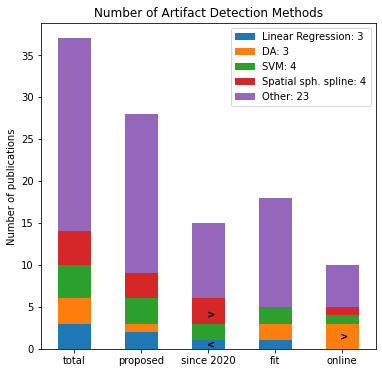

In [80]:
# Plot the results
fig = df_decomp.T.plot(kind='bar', stacked=True, figsize=(6,6))

# Print the significance levels
cumsum = -0.4
for idx, val in enumerate(df_decomp["proposed"]):
    cumsum += val/2
    plt.text(0.9725, cumsum, significances_proposed[idx], fontweight="bold")
    cumsum += val/2
cumsum = -0.85
for idx, val in enumerate(df_decomp["since 2020"]):
    cumsum += val/2
    plt.text(1.9725, cumsum, significances_2020[idx], fontweight="bold")
    cumsum += val/2
cumsum = -0.4
for idx, val in enumerate(df_decomp["fit"]):
    if val > 0:
        cumsum += val/2
        plt.text(2.9725, cumsum, significances_fit[idx], fontweight="bold")
        cumsum += val/2
cumsum = -0.4
for idx, val in enumerate(df_decomp["online"]):
    if val > 0:
        cumsum += val/2
        plt.text(3.9725, cumsum, significances_online[idx], fontweight="bold")
        cumsum += val/2

# plot layout
plt.title("Number of Artifact Detection Methods")
plt.ylabel("Number of publications")
plt.xticks(rotation=0)
plt.legend(labels, loc="upper right")
plt.show()

#### Special methods (total number of publications using them)

In [81]:
distr = (pipelines_annotated_df.groupby("Reference").agg("count")[
    ['MARA', 'DSS', 'DFA', 'FASTER', 'ADJUST', 'HAPPE', 'ERASE', 'Other.4']
        ]>0).sum(axis=0)
distr["Other"] = distr["Other.4"]

distr["Other"] += distr["DSS"]
distr["Other"] += distr["DFA"]
distr["Other"] += distr["HAPPE"]
distr["Other"] += distr["ERASE"]
[distr.pop(key) for key in distr.keys() if key in ['DSS', 'DFA', 'HAPPE', 'ERASE', 'Other.4']]

# store in df_decomp
df_decomp = pd.DataFrame(data=distr, columns=["total"])
df_decomp.head()

,total
MARA,4
FASTER,8
ADJUST,8
Other,14


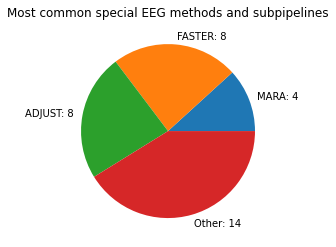

'Number of publications pipelines with selected special methods an subpipelines, methods occuring only in one publications are ignored.'

In [82]:
labels = [f"{p}: {v}" for p,v in distr.items()]
plt.pie(distr, labels=labels)
plt.title(f"Most common special EEG methods and subpipelines")
plt.show()
"Number of publications pipelines with selected special methods an subpipelines, methods occuring only in one publications are ignored."

#### Artefact detection and correction methods (proposed number of publications using them)

In [83]:
distr = (pipelines_annotated_df[pipelines_annotated_df["is new"] > 0].groupby("Reference").agg("count")[
    ['MARA', 'DSS', 'DFA', 'FASTER', 'ADJUST', 'HAPPE', 'ERASE', 'Other.4']
        ]>0).sum(axis=0)
distr["Other"] = distr["Other.4"]

distr["Other"] += distr["DSS"]
distr["Other"] += distr["DFA"]
distr["Other"] += distr["HAPPE"]
distr["Other"] += distr["ERASE"]
[distr.pop(key) for key in distr.keys() if key in ['DSS', 'DFA', 'HAPPE', 'ERASE', 'Other.4']]

# store in df_decomp
df_decomp["proposed"] = distr
df_decomp.head()

,total,proposed
MARA,4,2
FASTER,8,3
ADJUST,8,2
Other,14,10


#### Artefact detection and correction methods (number of publications since 2020 using them)

In [84]:
distr = (pipelines_annotated_df[pipelines_annotated_df["year"] >= 2020].groupby("Reference").agg("count")[
    ['MARA', 'DSS', 'DFA', 'FASTER', 'ADJUST', 'HAPPE', 'ERASE', 'Other.4']
        ]>0).sum(axis=0)
distr["Other"] = distr["Other.4"]

distr["Other"] += distr["DSS"]
distr["Other"] += distr["DFA"]
distr["Other"] += distr["HAPPE"]
distr["Other"] += distr["ERASE"]
[distr.pop(key) for key in distr.keys() if key in ['DSS', 'DFA', 'HAPPE', 'ERASE', 'Other.4']]

# store in df_decomp
df_decomp["since 2020"] = distr
df_decomp.head()

,total,proposed,since 2020
MARA,4,2,2
FASTER,8,3,3
ADJUST,8,2,4
Other,14,10,6


#### Artefact detection and correction methods (number publications of fit pipelines using them)

In [85]:
distr = (pipelines_annotated_df[pipelines_annotated_df["fit score (0-2)"] == 2].groupby("Reference").agg("count")[
    ['MARA', 'DSS', 'DFA', 'FASTER', 'ADJUST', 'HAPPE', 'ERASE', 'Other.4']
        ]>0).sum(axis=0)
distr["Other"] = distr["Other.4"]

distr["Other"] += distr["DSS"]
distr["Other"] += distr["DFA"]
distr["Other"] += distr["HAPPE"]
distr["Other"] += distr["ERASE"]
[distr.pop(key) for key in distr.keys() if key in ['DSS', 'DFA', 'HAPPE', 'ERASE', 'Other.4']]

# store in df_decomp
df_decomp["fit"] = distr
df_decomp.head()

,total,proposed,since 2020,fit
MARA,4,2,2,0
FASTER,8,3,3,3
ADJUST,8,2,4,3
Other,14,10,6,6


#### Artefact detection and correction methods (number publications of online pipelines using them)

In [86]:
distr = (pipelines_annotated_df[pipelines_annotated_df["online score (0-2)"] == 2].groupby("Reference").agg("count")[
    ['MARA', 'DSS', 'DFA', 'FASTER', 'ADJUST', 'HAPPE', 'ERASE', 'Other.4']
        ]>0).sum(axis=0)
distr["Other"] = distr["Other.4"]

distr["Other"] += distr["DSS"]
distr["Other"] += distr["DFA"]
distr["Other"] += distr["HAPPE"]
distr["Other"] += distr["ERASE"]
[distr.pop(key) for key in distr.keys() if key in ['DSS', 'DFA', 'HAPPE', 'ERASE', 'Other.4']]

# store in df_decomp
df_decomp["online"] = distr
df_decomp.head()

,total,proposed,since 2020,fit,online
MARA,4,2,2,0,0
FASTER,8,3,3,3,2
ADJUST,8,2,4,3,1
Other,14,10,6,6,2


### Plot the stacked barplot

In [87]:
# calculate the p-values to all cases
p_values_proposed = bootstrap_test_multiple(df_decomp["total"], df_decomp["proposed"], alternative="greater", n_resamples=10_000)
p_values_2020 = bootstrap_test_multiple(df_decomp["total"], df_decomp["since 2020"], alternative="greater", n_resamples=10_000)
p_values_fit = bootstrap_test_multiple(df_decomp["total"], df_decomp["fit"], alternative="greater", n_resamples=10_000)
p_values_online = bootstrap_test_multiple(df_decomp["total"], df_decomp["online"], alternative="greater", n_resamples=10_000)

p_values_proposed_less = bootstrap_test_multiple(df_decomp["total"], df_decomp["proposed"], alternative="less", n_resamples=10_000)
p_values_2020_less = bootstrap_test_multiple(df_decomp["total"], df_decomp["since 2020"], alternative="less", n_resamples=10_000)
p_values_fit_less = bootstrap_test_multiple(df_decomp["total"], df_decomp["fit"], alternative="less", n_resamples=10_000)
p_values_online_less = bootstrap_test_multiple(df_decomp["total"], df_decomp["online"], alternative="less", n_resamples=10_000)

In [88]:
# annotate the significances
ALPHA = 0.05
sig_char = ">"
sig_neg_char = "<"
insig_char = " "

significances_proposed = [sig_neg_char if p_values_proposed_less[idx] <= ALPHA else char 
                          for idx, char in enumerate([sig_char if p_values_proposed[idx] <= ALPHA else insig_char for idx in range(len(df_decomp))])]
significances_2020 = [sig_neg_char if p_values_2020_less[idx] <= ALPHA else char 
                      for idx, char in enumerate([sig_char if p_values_2020[idx] <= ALPHA else insig_char for idx in range(len(df_decomp))])]
significances_fit = [sig_neg_char if p_values_fit_less[idx] <= ALPHA else char 
                     for idx, char in enumerate([sig_char if p_values_fit[idx] <= ALPHA else insig_char for idx in range(len(df_decomp))])]
significances_online = [sig_neg_char if p_values_online_less[idx] <= ALPHA else char 
                        for idx, char in enumerate([sig_char if p_values_online[idx] <= ALPHA else insig_char for idx in range(len(df_decomp))])]


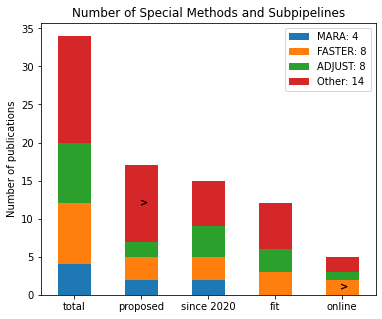

In [89]:
# Plot the results
fig = df_decomp.T.plot(kind='bar', stacked=True, figsize=(6,5))

# Print the significance levels
cumsum = -0.4
for idx, val in enumerate(df_decomp["proposed"]):
    cumsum += val/2
    plt.text(0.9725, cumsum, significances_proposed[idx], fontweight="bold")
    cumsum += val/2
cumsum = -0.85
for idx, val in enumerate(df_decomp["since 2020"]):
    cumsum += val/2
    plt.text(1.9725, cumsum, significances_2020[idx], fontweight="bold")
    cumsum += val/2
cumsum = -0.4
for idx, val in enumerate(df_decomp["fit"]):
    if val > 0:
        cumsum += val/2
        plt.text(2.9725, cumsum, significances_fit[idx], fontweight="bold")
        cumsum += val/2
cumsum = -0.4
for idx, val in enumerate(df_decomp["online"]):
    if val > 0:
        cumsum += val/2
        plt.text(3.9725, cumsum, significances_online[idx], fontweight="bold")
        cumsum += val/2

# plot layout
plt.title("Number of Special Methods and Subpipelines")
plt.ylabel("Number of publications")
plt.xticks(rotation=0)
plt.legend(labels, loc="upper right")
plt.show()

## Find publications that compare ICA with another method group

In [90]:
ica_refs = set(pipelines_annotated_df[~pipelines_annotated_df["ICA"].isnull()].groupby("Reference").agg("count").index)

In [91]:
ica_refs.intersection(
    set(pipelines_annotated_df[~pipelines_annotated_df["EMD"].isnull()].groupby("Reference").agg("count").index)
    ).difference({"Chen14", "Dai21", "Saini20"})  # remove some as there are no comparisions

set()

In [93]:
ica_refs.intersection(
    set(pipelines_annotated_df[~pipelines_annotated_df["CCA"].isnull()].groupby("Reference").agg("count").index)
).difference({"Nordin20"})  # remove some as there are no comparisions

{'Chen14', 'Dai21'}

In [92]:
ica_refs.intersection(
    set(pipelines_annotated_df[~pipelines_annotated_df["PCA"].isnull()].groupby("Reference").agg("count").index)
).difference({"Nordin20", "Anders20", 'Gabard-Durnam18', "Flo22", 'Sebek18', 'Tamburro18', "McMenamin10", "Winkler11"})  # remove some as there are no comparisions

{'Arad18', 'Gordon15', 'Rosanne21'}

In [94]:
ica_refs.intersection(
    set(pipelines_annotated_df[~pipelines_annotated_df["CSP"].isnull()].groupby("Reference").agg("count").index)
).difference({"Winkler11"})  # remove some as there are no comparisions

set()